In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

 ## Read the CSV and Perform Basic Data Cleaning    

In [4]:
df = pd.read_csv("Resources/Autism.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,...,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,...,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,...,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,...,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,...,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [5]:
df = pd.get_dummies(df)
pd.set_option('display.max_columns', None)
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,Sex_f,Sex_m,Ethnicity_aboriginal,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_others,Ethnicity_south asians,Ethnicity_white,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes,Residence_Afghanistan,Residence_AmericanSamoa,Residence_Angola,Residence_Antigua and Barbuda,Residence_Argentina,Residence_Armenia,Residence_Aruba,Residence_Australia,Residence_Austria,Residence_Azerbaijan,Residence_Bahamas,Residence_Bahrain,Residence_Bangladesh,Residence_Belgium,Residence_Bolivia,Residence_Brazil,Residence_Burundi,Residence_Canada,Residence_Chile,Residence_China,Residence_Costa Rica,Residence_Croatia,Residence_Cyprus,Residence_Czech Republic,Residence_Denmark,Residence_Djibouti,Residence_Ecuador,Residence_Egypt,Residence_Ethiopia,Residence_Finland,Residence_France,Residence_French Guiana,Residence_Germany,Residence_Honduras,Residence_Hong Kong,Residence_Hungary,Residence_Iceland,Residence_India,Residence_Indonesia,Residence_Iran,"Residence_Iran, Islamic Republic of",Residence_Iraq,Residence_Ireland,Residence_Italy,Residence_Japan,Residence_Jordan,Residence_Kazakhstan,Residence_Lebanon,Residence_Malaysia,Residence_Mexico,Residence_Nepal,Residence_Netherlands,Residence_New Zealand,Residence_Nicaragua,Residence_Niger,Residence_Norway,Residence_Oman,Residence_Pakistan,Residence_Peru,Residence_Philippines,Residence_Poland,Residence_Portugal,Residence_Qatar,Residence_Romania,Residence_Russia,Residence_Saint Kitts and Nevis,Residence_Saudi Arabia,Residence_Serbia,Residence_Sierra Leone,Residence_Singapore,Residence_South Africa,Residence_Spain,Residence_Sri Lanka,Residence_Sweden,Residence_Switzerland,Residence_Taiwan,Residence_Thailand,Residence_Tonga,Residence_Turkey,Residence_Turkmenistan,Residence_Ukraine,Residence_United Arab Emirates,Residence_United Kingdom,Residence_United States,Residence_Uruguay,Residence_Viet Nam,"Residence_Virgin Islands, U.S.",Residence_Zambia,Used_App_Before_no,Used_App_Before_yes,Screening Type_17 and more,Language_arabic,Language_english,Language_farsi,Language_french,Language_mandarin,Language_portuguese,Language_russian,Language_spanish,Language_turkish,Language_urdu,User_friend,User_health care professional,User_others,User_parent,User_relative,User_self,User_teacher,Class_NO,Class_YES
0,6,0,0,0,0,0,0,0,0,0,0,27,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,10,1,1,1,1,1,1,1,1,1,1,21,10,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,12,1,1,0,1,1,0,0,1,0,0,18,5,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,16,1,0,0,0,1,1,1,1,1,1,49,7,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,20,1,1,1,0,0,0,0,1,0,0,18,4,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## Select your features (columns)    

In [6]:
# Set features. This will also be used as your x values.
X = df.drop(columns=['Class_NO','Class_YES', 'Case No'])
y = df[['Class_NO','Class_YES']]
print(X.shape, y.shape)

(1117, 135) (1117, 2)


In [ ]:
# Now after the feature selections below gridsearch I'll redo my X and y, change in train test split

## Create a Train Test Split     
*Use koi_disposition for the y values*

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)
#X, y, random_state = 42

## Pre-processing     
*Scale the data using the MinMaxScaler and perform some feature selection*

In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

#X
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#y
y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

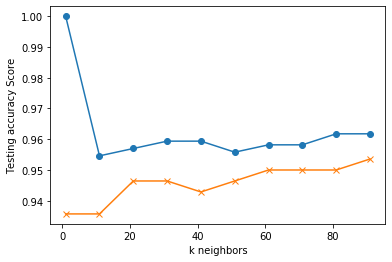

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 100, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train_scaled)
    test_score = knn.score(X_test_scaled, y_test_scaled)
    train_scores.append(train_score)
    test_scores.append(test_score)
    #print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 100, 10), train_scores, marker='o')
plt.plot(range(1, 100, 10), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [20]:
# Note that k: 21 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=21)
gs = knn.fit(X_train_scaled, y_train_scaled)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_scaled))

# I could do a bunch of different 'fits' here
gs

k=21 Test Acc: 0.946


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [13]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.956989247311828
Testing Data Score: 0.9464285714285714


In [24]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {'leaf_size': [1, 2, 5, 30, 36], 'n_neighbors': [11, 19, 21, 23, 51], 
             'p': [1, 2, 3, 6]}
grid = GridSearchCV(knn, param_grid, verbose=3)
#{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 51, 'p': 1}
#0.9629629629629629

In [25]:
# Train the model with GridSearch
grid.fit(X_train_scaled,y_train_scaled)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] leaf_size=1, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=1, score=0.935, total=   0.2s
[CV] leaf_size=1, n_neighbors=11, p=1 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... leaf_size=1, n_neighbors=11, p=1, score=0.957, total=   0.2s
[CV] leaf_size=1, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=1, score=0.964, total=   0.2s
[CV] leaf_size=1, n_neighbors=11, p=2 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .... leaf_size=1, n_neighbors=11, p=2, score=0.932, total=   0.3s
[CV] leaf_size=1, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=2, score=0.957, total=   0.3s
[CV] leaf_size=1, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=2, score=0.964, total=   0.3s
[CV] leaf_size=1, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=3, score=0.932, total=   0.4s
[CV] leaf_size=1, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=3, score=0.957, total=   0.3s
[CV] leaf_size=1, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=3, score=0.964, total=   0.3s
[CV] leaf_size=1, n_neighbors=11, p=6 ................................
[CV] .... leaf_size=1, n_neighbors=11, p=6, score=0.932, total=   0.3s
[CV] leaf_size=1, n_neighbors=11, p=6 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=11, p=1, score=0.957, total=   0.1s
[CV] leaf_size=2, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=1, score=0.964, total=   0.1s
[CV] leaf_size=2, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=2, score=0.932, total=   0.3s
[CV] leaf_size=2, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=2, score=0.957, total=   0.2s
[CV] leaf_size=2, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=2, score=0.968, total=   0.2s
[CV] leaf_size=2, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=3, score=0.932, total=   0.3s
[CV] leaf_size=2, n_neighbors=11, p=3 ................................
[CV] .... leaf_size=2, n_neighbors=11, p=3, score=0.957, total=   0.3s
[CV] leaf_size=2, n_neighbors=11, p=3 ................................
[CV] .

[CV] .... leaf_size=2, n_neighbors=51, p=6, score=0.964, total=   0.4s
[CV] leaf_size=5, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=1, score=0.935, total=   0.1s
[CV] leaf_size=5, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=1, score=0.957, total=   0.1s
[CV] leaf_size=5, n_neighbors=11, p=1 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=1, score=0.964, total=   0.1s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.932, total=   0.1s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.957, total=   0.1s
[CV] leaf_size=5, n_neighbors=11, p=2 ................................
[CV] .... leaf_size=5, n_neighbors=11, p=2, score=0.964, total=   0.1s
[CV] leaf_size=5, n_neighbors=11, p=3 ................................
[CV] .

[CV] .... leaf_size=5, n_neighbors=51, p=6, score=0.939, total=   0.2s
[CV] leaf_size=5, n_neighbors=51, p=6 ................................
[CV] .... leaf_size=5, n_neighbors=51, p=6, score=0.975, total=   0.2s
[CV] leaf_size=5, n_neighbors=51, p=6 ................................
[CV] .... leaf_size=5, n_neighbors=51, p=6, score=0.964, total=   0.3s
[CV] leaf_size=30, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=1, score=0.935, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=1, score=0.957, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=1, score=0.964, total=   0.0s
[CV] leaf_size=30, n_neighbors=11, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=11, p=2, score=0.932, total=   0.1s
[CV] leaf_size=30, n_neighbors=11, p=2 ...............................
[CV] .

[CV] ... leaf_size=30, n_neighbors=51, p=3, score=0.975, total=   0.2s
[CV] leaf_size=30, n_neighbors=51, p=3 ...............................
[CV] ... leaf_size=30, n_neighbors=51, p=3, score=0.964, total=   0.2s
[CV] leaf_size=30, n_neighbors=51, p=6 ...............................
[CV] ... leaf_size=30, n_neighbors=51, p=6, score=0.939, total=   0.2s
[CV] leaf_size=30, n_neighbors=51, p=6 ...............................
[CV] ... leaf_size=30, n_neighbors=51, p=6, score=0.975, total=   0.2s
[CV] leaf_size=30, n_neighbors=51, p=6 ...............................
[CV] ... leaf_size=30, n_neighbors=51, p=6, score=0.964, total=   0.2s
[CV] leaf_size=36, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=1, score=0.935, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=1 ...............................
[CV] ... leaf_size=36, n_neighbors=11, p=1, score=0.957, total=   0.0s
[CV] leaf_size=36, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=36, n_neighbors=51, p=3, score=0.939, total=   0.2s
[CV] leaf_size=36, n_neighbors=51, p=3 ...............................
[CV] ... leaf_size=36, n_neighbors=51, p=3, score=0.978, total=   0.2s
[CV] leaf_size=36, n_neighbors=51, p=3 ...............................
[CV] ... leaf_size=36, n_neighbors=51, p=3, score=0.964, total=   0.2s
[CV] leaf_size=36, n_neighbors=51, p=6 ...............................
[CV] ... leaf_size=36, n_neighbors=51, p=6, score=0.939, total=   0.2s
[CV] leaf_size=36, n_neighbors=51, p=6 ...............................
[CV] ... leaf_size=36, n_neighbors=51, p=6, score=0.975, total=   0.2s
[CV] leaf_size=36, n_neighbors=51, p=6 ...............................
[CV] ... leaf_size=36, n_neighbors=51, p=6, score=0.964, total=   0.2s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=21, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 5, 30, 36],
                         'n_neighbors': [11, 19, 21, 23, 51],
                         'p': [1, 2, 3, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [26]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 1, 'n_neighbors': 51, 'p': 1}
0.9629629629629629


In [34]:
# print out list of feature importances
# then go back up to feature selection
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train_scaled,y_train_scaled)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(60)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


A9                                0.204832
A6                                0.116297
Score                             0.099676
A5                                0.071457
A3                                0.064956
A4                                0.063333
A1                                0.044825
A7                                0.037236
A10                               0.033512
A2                                0.031165
Age                               0.018941
A8                                0.017015
Ethnicity_white                   0.014408
Sex_f                             0.010675
Residence_United States           0.010675
Family_ASD_no                     0.009684
Ethnicity_middle eastern          0.009215
Ethnicity_asian                   0.008363
Jaundice _no                      0.008133
Residence_India                   0.007675
User_self                         0.007259
Sex_m                             0.006786
User_parent                       0.006617
Residence_U

In [ ]:
predictions = gs.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test_scaled, predictions))

## OBSERVATIONS

The order of ethnicities' weights mostly falls in line with their order of amount of total participants.  The two interesting cases are 'latino' and 'others'.  Latino is potentially of more interest.  The rank 7 out of 9 as far as their portion of total participants, but in 'feature selection' and order of ethnicities, latino comes fourth.  Others also has a variance of 3.  That's the highest.

With just scores and age:
{'leaf_size': 2, 'n_neighbors': 11, 'p': 1}
0.985663082437276     

I removed age because it was the least important of score, questions, and age, but there was a definite decline:      
{'leaf_size': 1, 'n_neighbors': 21, 'p': 1}
0.9689366786140979    
BUT  could that again be because a majority of the ages tested fell within a certain age range?     
I could be overfitting it.
Age might not be correlated to score and questions, but that doesn't mean that age isn't correlated to the class.